In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1

X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the images to a 1D array

X_train = X_train.reshape(X_train.shape[0], -1)

X_test = X_test.reshape(X_test.shape[0], -1)

In [5]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),          
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),                 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


Epoch 1/10


1500/1500 [==============================] - 12s 7ms/step - loss: 0.3253 - accuracy: 0.9055 - val_loss: 0.1550 - val_accuracy: 0.9574
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1571 - accuracy: 0.9536 - val_loss: 0.1155 - val_accuracy: 0.9663
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1182 - accuracy: 0.9652 - val_loss: 0.0995 - val_accuracy: 0.9703
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0938 - accuracy: 0.9716 - val_loss: 0.0927 - val_accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0785 - accuracy: 0.9753 - val_loss: 0.0849 - val_accuracy: 0.9751
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0680 - accuracy: 0.9779 - val_loss: 0.0857 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0602 - accuracy: 0.9803 - val_loss: 0.0781 - val_a

In [6]:
predictions = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


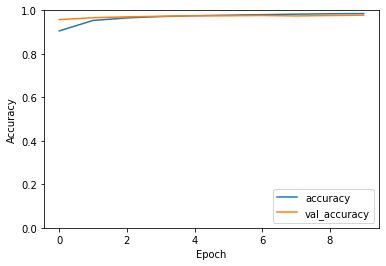

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4


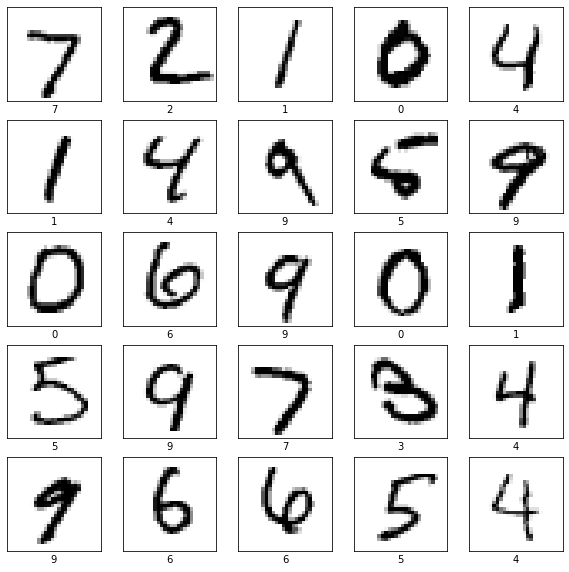

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot some test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
    print(np.array(np.argmax(predictions[i])))
plt.show()
